In [1]:
import anndata
import anndata as ad
import os
import numpy as np
import pickle
import pandas as pd
from pandas.api.types import CategoricalDtype
from rpy2.robjects import r, pandas2ri
from rpy2.robjects.packages import importr
import scanpy as sc
from scipy import sparse
import matplotlib.pyplot as plt
import rpy2.robjects as ro



In [2]:
sc.settings.verbosity=0 # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.n_jobs=4
sc.settings.set_figure_params  (dpi_save=300, facecolor="white", frameon=False, figsize=(8,8))
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
%matplotlib inline


In [3]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [4]:
sc.settings.figdir = "fig8"


# Load all cells

In [5]:
# pandas2ri.activate()

# seurat = importr('Seurat')
# matrix = importr('Matrix')

# file_path = os.path.expanduser("/lustre/scratch126/cellgen/team298/ls34/Mouse_SS_Fibro.RDS")

# # Define the R function to read a Seurat object from an RDS file
# r('''
#     library(Seurat)
#     read_seurat_obj <- function(file_path) {
#         readRDS(file_path)
#     }
# ''')

# seurat_obj = ro.r['read_seurat_obj'](file_path)

# num_cells = ro.r('function(x) dim(x)[2]')(seurat_obj)[0]
# num_genes = ro.r('function(x) dim(x)[1]')(seurat_obj)[0]
# print(f"The dataset contains {num_cells} cells and {num_genes} genes.")

# r('''
#     library(Seurat)
#     library(Matrix)
#     get_sparse_matrix <- function(x) {
#         counts <- GetAssayData(x, slot = "counts")
#         sparse_counts <- as(counts, "CsparseMatrix")
#         return(sparse_counts)
#     }
# ''')

# exprs = ro.r('get_sparse_matrix')(seurat_obj)
# meta_data = np.array(ro.r('function(x) as.data.frame(x@meta.data)')(seurat_obj))
# meta_data_colnames = list(ro.r('function(x) colnames(x@meta.data)')(seurat_obj))
# gene_names = np.array(ro.r('function(x) rownames(GetAssayData(x, slot = "counts"))')(seurat_obj))

# exprs_sparse = sparse.csc_matrix((exprs.do_slot("x"), exprs.do_slot("i"), exprs.do_slot("p")), shape=exprs.do_slot("Dim"))

# meta_data_df = pd.DataFrame(meta_data.T, columns=meta_data_colnames)  # Transpose the metadata

# adata = ad.AnnData(X=exprs_sparse.T, obs=meta_data_df, var=pd.DataFrame(index=gene_names))
# adata

In [6]:
# sc.pp.normalize_total(adata, target_sum=1e4)
# sc.pp.log1p(adata)


In [7]:
# adata.write('/nfs/team298/ls34/disease_atlas/final_fb_adatas/adata_mouse_normalized.h5ad')

In [8]:
adata = sc.read_h5ad('/nfs/team298/ls34/fibroblast_atlas_paper/final_adatas_chloecolours/adata_mouse_normalized.h5ad')


In [9]:
adata_hum = sc.read_h5ad(\
                         '/nfs/team298/ls34/fibroblast_atlas_paper/final_adatas_chloecolours/adata_all.h5ad'
  #  '/nfs/team298/ls34/disease_atlas/final_fb_adatas/adata_fbspericytesnonlesional_SCVI_3526_new_neighbor50_ANNOTATED_umap30_leiden_paga3_FINALcoreonly.h5ad.v3'
                        )
                         
                         #'/nfs/team298/ls34/disease_atlas/data2/adata_fbspericytesnonlesional_SCVI_3526_new_neighbor50_ANNOTATED_umap30_leiden_paga3_FINALcoreonly.h5ad')


# Plot figures

In [10]:
adata_skin = adata[adata.obs["Tissue"]=="Skin"]

In [11]:
desired_order = [ 'Pi16',
                  'Col15a1',
                  'Comp',
               
 'Cxcl12',
                   'Ccl19',


 'Coch',
                  'Bmp4',
 'Hhip',
 'Fbln1',
 'Npnt',

]
from pandas.api.types import CategoricalDtype

cat_type = CategoricalDtype(categories=desired_order, ordered=True)
adata.obs['ClustName2'] = adata.obs['ClustName'].astype(cat_type)
adata_skin.obs['ClustName2'] = adata_skin.obs['ClustName'].astype(cat_type)


/tmp/ipykernel_19527/4154255040.py:20: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_skin.obs['ClustName2'] = adata_skin.obs['ClustName'].astype(cat_type)


In [12]:
pickle_file_path = '/nfs/team298/ls34/fb_dict.pkl'
with open(pickle_file_path, 'rb') as file:
    reynolds_short_final = pickle.load(file)
reynolds_short_final["F3"]


['CCL19',
 'CD74',
 'CH25H',
 'TNFSF13B',
 'IL33',
 'IRF8',
 'IL15',
 'VCAM1',
 'HLA-DRA',
 'HLA-DRB1']

# 8f

/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(

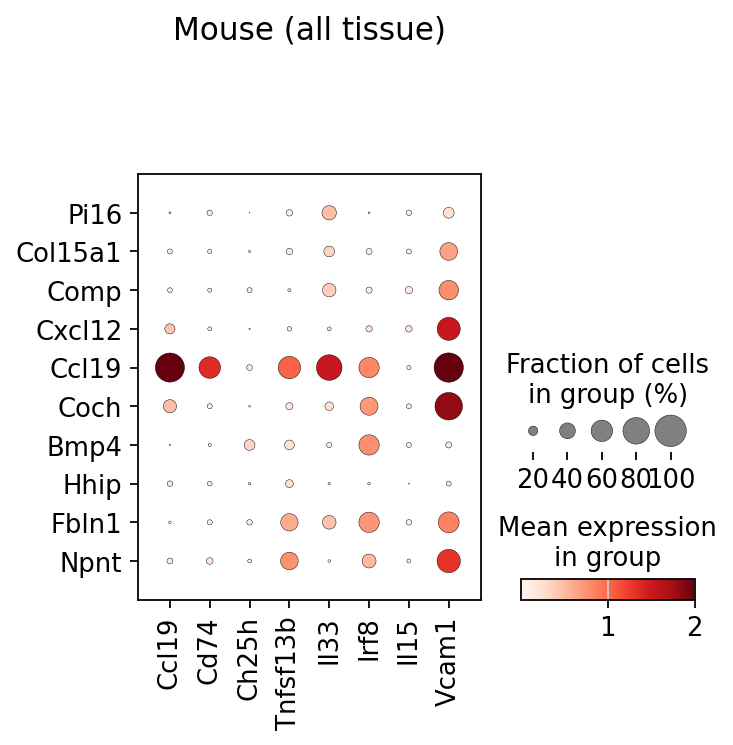

In [13]:
flattened_list_o=['CCL19',
 'CD74',
 'CH25H',
 'TNFSF13B',
 'IL33',
 'IRF8',
 'IL15',
 'VCAM1',
 'HLA-DRA',
 'HLA-DRB1'] 

flattened_list = [s.capitalize() for s in flattened_list_o]
flattened_list = [x for x in flattened_list if x in adata.var_names]
flattened_list

sc.pl.dotplot(
    adata,
    flattened_list,
    groupby="ClustName2",
    #standard_scale="var",
    vmax=2,
    dendrogram=False,
    title="Mouse (all tissue)",
    save="mouse_homologousgenes.pdf"
) 


In [14]:
adata_ccl19only = adata[adata.obs["ClustName2"]=="Ccl19"]
adata_ccl19only=adata_ccl19only[adata_ccl19only.obs["Tissue"].isin(["Lymph Node","Liver", "Lung", "Pancreas", "Intestine", "Skin"])]

/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(

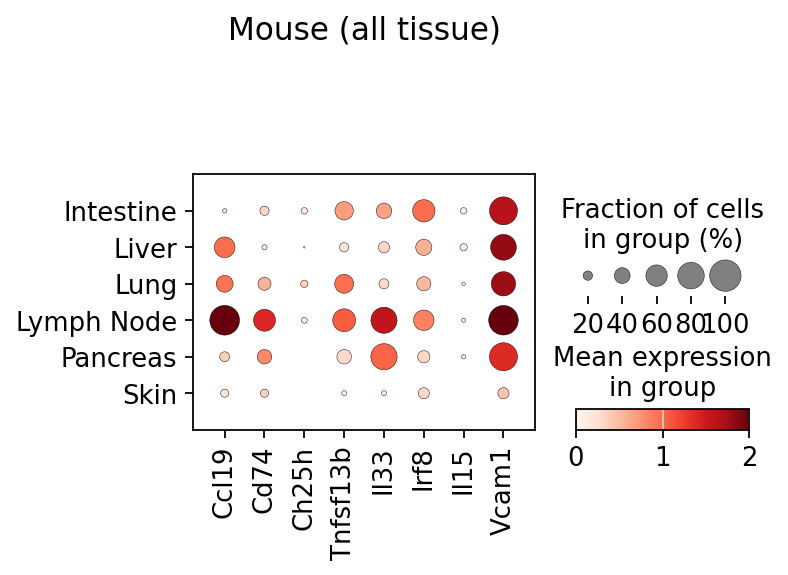

In [15]:
sc.pl.dotplot(
    adata_ccl19only,
    flattened_list,
    groupby="Tissue",
    #standard_scale="var",
    vmax=2,
    dendrogram=False,
    title="Mouse (all tissue)",
   # save="mouse_homologousgenes.pdf"
) 
 

# Mouse atlas

In [16]:
desired_order = [ 'Pi16',
                  'Col15a1',
                  'Comp',
               
 'Cxcl12',
                   'Ccl19',


 'Coch',
                  'Bmp4',
 'Hhip',
 'Fbln1',
 'Npnt',

]

cat_type = CategoricalDtype(categories=desired_order, ordered=True)
adata.obs['ClustName2'] = adata.obs['ClustName'].astype(cat_type)
adata_skin.obs['ClustName2'] = adata_skin.obs['ClustName'].astype(cat_type)
 


In [18]:
adata_skin = adata[adata.obs["Tissue"]=="Skin"]

In [19]:
adata.obs["Tissue"].value_counts()

Tissue
Heart                   25492
Subcutaneous Adipose    16695
Lymph Node              15898
Lung                    11839
Intestine                9235
Skin                     8968
Bone                     8193
Spleen                   6315
Visceral Adipose         4916
Muscle                   3804
Artery                   2508
Pancreas                 2167
Liver                    1603
Omentum                  1440
Mesentery                 922
Tendon                    588
Name: count, dtype: int64

In [20]:
adata_liver = adata[adata.obs["Tissue"]=="Liver"]
adata_LN = adata[adata.obs["Tissue"]=="Lymph Node"]
adata_lung = adata[adata.obs["Tissue"]=="Lung"]
adata_colon= adata[adata.obs["Tissue"]=="Intestine"]
adata_panc= adata[adata.obs["Tissue"]=="Pancreas"]



In [21]:
adata_hum.obs["corefb_names"].value_counts()

corefb_names
Lesional                     190756
F2: Universal (reticular)     60120
F2: Bridge                    29376
F1: Secretory                 27427
F4: DPEP1                     19969
F3: CCL19                     19884
F4: TNN+COCH+                  3604
F5: SFRP4+                     2769
F5: RAMP1+                     1535
F4: DP_HHIP+                    965
F2: Skoog's fascia              871
Name: count, dtype: int64

In [22]:
mapping_dict = {
    "F2: Universal": "Pi16",
    "F2/3: Stroma_PPARG+": "Cxcl12",
    "F3: FRC-like": "Ccl19",
    "F1: Secretory": "Comp",
    "F4: TNN+COCH+": "Coch",
    "F4: DP_HHIP+": "Hhip"
}

adata_hum.obs["ClustName"] = adata_hum.obs["test13"].map(mapping_dict)

adata_hum.obs["ClustName"].fillna("F4 DPEP1 + F5", inplace=True)
adata_hum.obs["ClustName2"] = adata_hum.obs["ClustName"]

/tmp/ipykernel_19527/2473190115.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  adata_hum.obs["ClustName"].fillna("F4 DPEP1 + F5", inplace=True)


In [23]:
adata_skin_proportions = adata_skin.obs['ClustName'].value_counts(normalize=True).sort_values(ascending=False)
adata_lung_proportions = adata_lung.obs['ClustName'].value_counts(normalize=True).sort_values(ascending=False)
adata_liver_proportions = adata_liver.obs['ClustName'].value_counts(normalize=True).sort_values(ascending=False)
adata_colon_proportions = adata_colon.obs['ClustName'].value_counts(normalize=True).sort_values(ascending=False)
adata_panc_proportions = adata_panc.obs['ClustName'].value_counts(normalize=True).sort_values(ascending=False)

adata_panc_proportions

ClustName
Col15a1    0.503000
Pi16       0.470697
Coch       0.010152
Ccl19      0.006461
Comp       0.003692
Cxcl12     0.003230
Npnt       0.002307
Fbln1      0.000461
Name: proportion, dtype: float64

In [24]:



adata_proportions = adata.obs['ClustName'].value_counts(normalize=True).sort_values(ascending=False)
adata_hum_proportions = adata_hum.obs['ClustName2'].value_counts(normalize=True).sort_values(ascending=False)
all_categories = sorted(set(adata_skin_proportions.index).union(adata_proportions.index).union(adata_hum_proportions.index))
adata_proportions = adata_proportions[~adata_proportions.index.duplicated()]
adata_hum_proportions = adata_hum_proportions[~adata_hum_proportions.index.duplicated()]


adata_skin_proportions = adata_skin_proportions[~adata_skin_proportions.index.duplicated()]
adata_lung_proportions = adata_lung_proportions[~adata_lung_proportions.index.duplicated()]
adata_colon_proportions = adata_colon_proportions[~adata_colon_proportions.index.duplicated()]
adata_liver_proportions = adata_liver_proportions[~adata_liver_proportions.index.duplicated()]
adata_panc_proportions = adata_panc_proportions[~adata_panc_proportions.index.duplicated()]


adata_skin_proportions = adata_skin_proportions.reindex(all_categories, fill_value=0)
adata_proportions = adata_proportions.reindex(all_categories, fill_value=0)
adata_hum_proportions = adata_hum_proportions.reindex(all_categories, fill_value=0)
adata_lung_proportions = adata_lung_proportions.reindex(all_categories, fill_value=0)
adata_liver_proportions = adata_liver_proportions.reindex(all_categories, fill_value=0)
adata_colon_proportions = adata_colon_proportions.reindex(all_categories, fill_value=0)

adata_panc_proportions = adata_panc_proportions.reindex(all_categories, fill_value=0)



df_skin = pd.DataFrame({'ClustName': adata_skin_proportions.index, 'Proportion': adata_skin_proportions.values, 'Dataset': 'Skin only (mouse)'})
df_adata = pd.DataFrame({'ClustName': adata_proportions.index, 'Proportion': adata_proportions.values, 'Dataset': 'All tissues (mouse)'})
df_hum = pd.DataFrame({'ClustName': adata_hum_proportions.index, 'Proportion': adata_hum_proportions.values, 'Dataset': 'Skin only (human)'})
df_lung = pd.DataFrame({'ClustName': adata_lung_proportions.index, 'Proportion': adata_lung_proportions.values, 'Dataset': 'Lung only (mouse)'})
df_colon = pd.DataFrame({'ClustName': adata_colon_proportions.index, 'Proportion': adata_colon_proportions.values, 'Dataset': 'Intestine only (mouse)'})
df_liver = pd.DataFrame({'ClustName': adata_liver_proportions.index, 'Proportion': adata_liver_proportions.values, 'Dataset': 'Liver only (mouse)'})
df_panc = pd.DataFrame({'ClustName': adata_panc_proportions.index, 'Proportion': adata_panc_proportions.values, 'Dataset': 'Pancreas only (mouse)'})


df_combined = pd.concat([df_adata, df_panc, df_colon, df_liver, df_skin, df_hum])
df_combined['ClustName'] = df_combined['ClustName'].apply(lambda x: x if x == 'Ccl19' else 'Other')

df_grouped = df_combined.groupby(['ClustName', 'Dataset']).agg({'Proportion': 'sum'}).reset_index()

df_grouped


,ClustName,Dataset,Proportion
0,Ccl19,All tissues (mouse),0.125018
1,Ccl19,Intestine only (mouse),0.004440
2,Ccl19,Liver only (mouse),0.034934
3,Ccl19,Pancreas only (mouse),0.006461
4,Ccl19,Skin only (human),0.115854
5,Ccl19,Skin only (mouse),0.001338
6,Other,All tissues (mouse),0.874982
7,Other,Intestine only (mouse),0.995560
8,Other,Liver only (mouse),0.965066
9,Other,Pancreas only (mouse),0.993539


In [25]:
plt.style.use('seaborn-white')

adata_skin_proportions = adata_skin.obs['ClustName'].value_counts(normalize=True).sort_values(ascending=False)
adata_colon_proportions = adata_colon.obs['ClustName'].value_counts(normalize=True).sort_values(ascending=False)
adata_LN_proportions = adata_LN.obs['ClustName'].value_counts(normalize=True).sort_values(ascending=False)

adata_proportions = adata.obs['ClustName'].value_counts(normalize=True).sort_values(ascending=False)

df_skin = pd.DataFrame({'ClustName': adata_skin_proportions.index, 'Proportion': adata_skin_proportions.values, 'Dataset': 'Skin only (mouse)'})
df_liver = pd.DataFrame({'ClustName': adata_liver_proportions.index, 'Proportion': adata_liver_proportions.values, 'Dataset': 'Liver only (mouse)'})
df_colon = pd.DataFrame({'ClustName': adata_colon_proportions.index, 'Proportion': adata_colon_proportions.values, 'Dataset': 'Intestine only (mouse)'})
df_panc = pd.DataFrame({'ClustName': adata_panc_proportions.index, 'Proportion': adata_panc_proportions.values, 'Dataset': 'Pancreas only (mouse)'})

df_LN = pd.DataFrame({'ClustName': adata_LN_proportions.index, 'Proportion': adata_LN_proportions.values, 'Dataset': 'LN only (mouse)'})
df_lung = pd.DataFrame({'ClustName': adata_lung_proportions.index, 'Proportion': adata_lung_proportions.values, 'Dataset': 'Lung only (mouse)'})
df_hum = pd.DataFrame({'ClustName': adata_hum_proportions.index, 'Proportion': adata_hum_proportions.values, 'Dataset': 'Skin only (human)'})


df_combined = pd.concat([ df_lung,df_panc, df_LN, df_colon, df_liver, df_skin,df_hum])

df_grouped = df_combined.groupby(['ClustName', 'Dataset']).agg({'Proportion': 'sum'}).reset_index()
df_grouped

/tmp/ipykernel_19527/3614659940.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


,ClustName,Dataset,Proportion
0,Bmp4,Intestine only (mouse),0.168923
1,Bmp4,LN only (mouse),0.000377
2,Bmp4,Liver only (mouse),0.009981
3,Bmp4,Lung only (mouse),0.001183
4,Bmp4,Pancreas only (mouse),0.000000
...,...,...,...
69,Pi16,Liver only (mouse),0.004367
70,Pi16,Lung only (mouse),0.031253
71,Pi16,Pancreas only (mouse),0.470697
72,Pi16,Skin only (human),0.207568


In [27]:
plt.style.use('seaborn-white')

adata_skin_proportions = adata_skin.obs['ClustName'].value_counts(normalize=True).sort_values(ascending=False)
adata_colon_proportions = adata_colon.obs['ClustName'].value_counts(normalize=True).sort_values(ascending=False)
adata_LN_proportions = adata_LN.obs['ClustName'].value_counts(normalize=True).sort_values(ascending=False)

adata_proportions = adata.obs['ClustName'].value_counts(normalize=True).sort_values(ascending=False)

df_skin = pd.DataFrame({'ClustName': adata_skin_proportions.index, 'Proportion': adata_skin_proportions.values, 'Dataset': 'Skin (mouse)'})
df_colon = pd.DataFrame({'ClustName': adata_colon_proportions.index, 'Proportion': adata_colon_proportions.values, 'Dataset': 'Intestine (mouse)'})
df_liver = pd.DataFrame({'ClustName': adata_liver_proportions.index, 'Proportion': adata_liver_proportions.values, 'Dataset': 'Liver (mouse)'})
df_LN = pd.DataFrame({'ClustName': adata_LN_proportions.index, 'Proportion': adata_LN_proportions.values, 'Dataset': 'LN (mouse)'})
df_lung = pd.DataFrame({'ClustName': adata_lung_proportions.index, 'Proportion': adata_lung_proportions.values, 'Dataset': 'Lung (mouse)'})
df_hum = pd.DataFrame({'ClustName': adata_hum_proportions.index, 'Proportion': adata_hum_proportions.values, 'Dataset': 'Skin (human)'})
df_panc = pd.DataFrame({'ClustName': adata_panc_proportions.index, 'Proportion': adata_panc_proportions.values, 'Dataset': 'Pancreas (mouse)'})


df_combined = pd.concat([  df_LN, df_lung,df_panc,  df_colon, df_liver, df_skin,df_hum, ])

df_grouped = df_combined.groupby(['ClustName', 'Dataset']).agg({'Proportion': 'sum'}).reset_index()

df_grouped[df_grouped["ClustName"]=="Ccl19"]

/tmp/ipykernel_19527/3606487569.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


,ClustName,Dataset,Proportion
7,Ccl19,Intestine (mouse),0.004440
8,Ccl19,LN (mouse),0.851113
9,Ccl19,Liver (mouse),0.034934
10,Ccl19,Lung (mouse),0.004646
11,Ccl19,Pancreas (mouse),0.006461
12,Ccl19,Skin (human),0.115854
13,Ccl19,Skin (mouse),0.001338


# 8g

/tmp/ipykernel_19527/338807619.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), fontsize=18, rotation=270)  # Adjust x-tick font size (smaller)


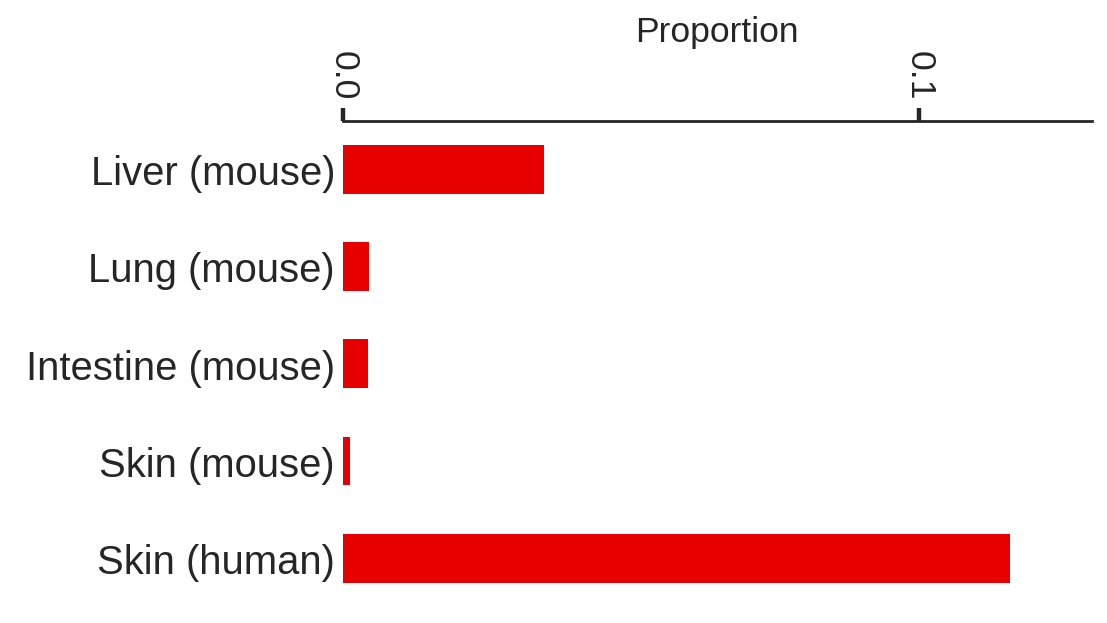

In [33]:
df_grouped['Proportion'] = df_grouped['Proportion'].round(4)
df_pivot = df_grouped.pivot(index='Dataset', columns='ClustName', values='Proportion').fillna(0)

order = ['Liver (mouse)', 'Lung (mouse)', 'Intestine (mouse)', "Skin (mouse)", "Skin (human)"]
df_pivot = df_pivot.loc[order]

df_pivot = df_pivot[['Ccl19']]

color = '#e60000'  # Stronger red


ax = df_pivot.plot(kind='barh', stacked=True, color=color, figsize=(6, 4))  


ax.xaxis.set_label_position('top')   
ax.xaxis.tick_top()  


ax.invert_yaxis()  


ax.set_yticklabels(ax.get_yticklabels(), fontsize=18)   
ax.set_xticklabels(ax.get_xticks(), fontsize=18, rotation=270)  


ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=18)


ax.set_ylabel(' ', fontsize=0, rotation=90)   


ax.spines['top'].set_visible(True)   
ax.spines['right'].set_visible(False)   
ax.spines['left'].set_visible(False)   
ax.spines['bottom'].set_visible(False)   

ax.set_xlabel('Proportion', fontsize=16)   


ax.set_xlim(0, 0.13)   
ax.set_xticks([0.0, 0.1])  
ax.set_xticklabels([f'{x:.1f}' for x in ax.get_xticks()], fontsize=16)   


ax.xaxis.set_tick_params(length=6, width=2)  


ax.get_legend().remove()


ax.grid(False)


plt.savefig("fig8/mouse_ccl19_horizontal_top_axis.pdf", dpi=300, bbox_inches='tight')
plt.show()

# sfig 10a

/tmp/ipykernel_19527/197461405.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), fontsize=20)


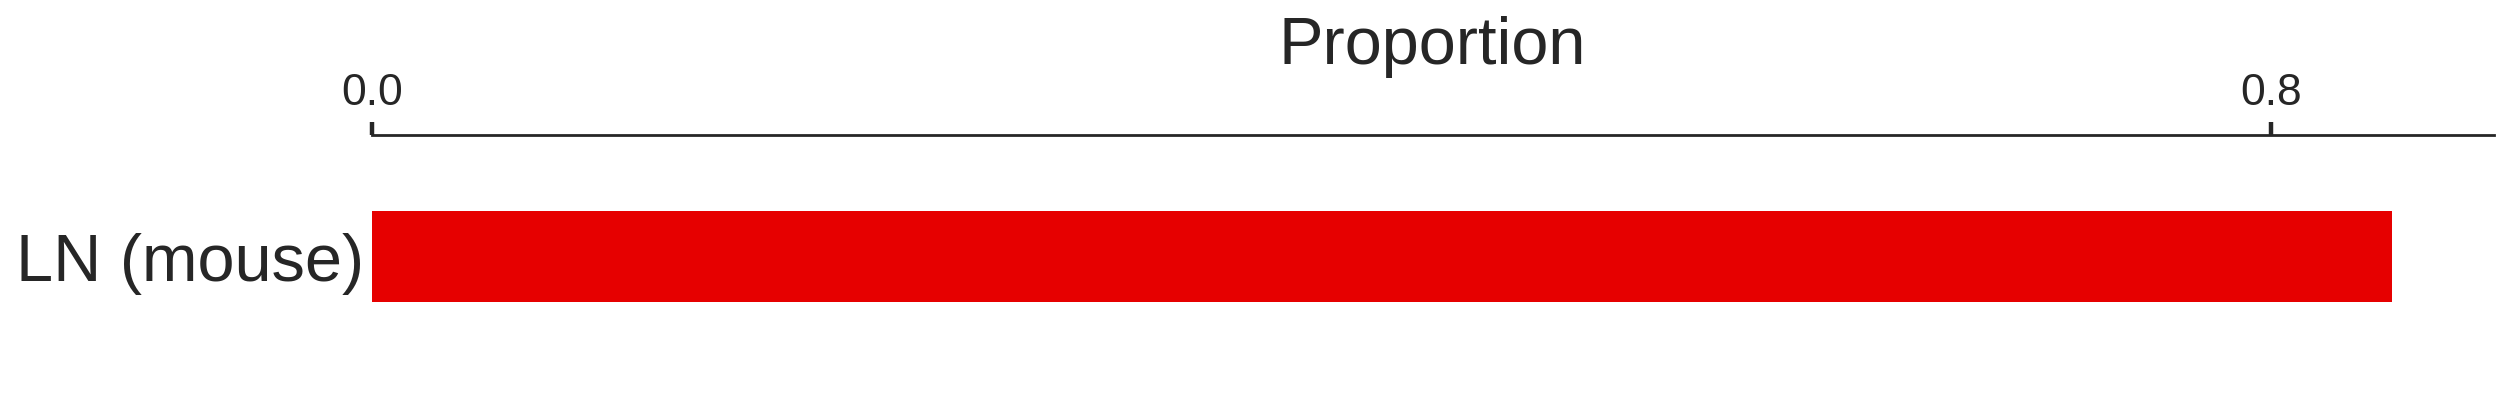

In [36]:
df_grouped['Proportion'] = df_grouped['Proportion'].round(4)
df_pivot = df_grouped.pivot(index='Dataset', columns='ClustName', values='Proportion').fillna(0)
order = ['LN (mouse)',]
df_pivot = df_pivot.loc[order]
df_pivot = df_pivot[['Ccl19']]

color = '#e60000'  # Stronger red

ax = df_pivot.plot(kind='barh', stacked=True, color=color, figsize=(17, 2), width=0.3)  # Adjust the width here  

ax.xaxis.set_label_position('top')  
ax.xaxis.tick_top()  
ax.invert_yaxis()  

ax.set_yticklabels(ax.get_yticklabels(), fontsize=30)  # 
ax.set_xticklabels(ax.get_xticks(), fontsize=20)  
ax.spines['top'].set_visible(True) 
ax.spines['right'].set_visible(False)  
ax.spines['left'].set_visible(False)  
ax.spines['bottom'].set_visible(False)  

ax.set_ylabel('')   
ax.set_xlabel('Proportion', fontsize=30)  


ax.set_xticks([0.0, 0.8])  
ax.set_xticklabels([f'{x:.1f}' for x in ax.get_xticks()], fontsize=20)

ax.xaxis.set_tick_params(length=6, width=2)  

ax.get_legend().remove()

ax.grid(False)

plt.savefig("sfig10/10a_mouse_ccl19_horizontal_LN_axis.pdf", dpi=300, bbox_inches='tight')
plt.show()


In [35]:
sc.logging.print_versions()




-----
anndata     0.10.6
scanpy      1.9.8
-----
PIL                         9.5.0
anyio                       NA
arrow                       1.3.0
asciitree                   NA
asttokens                   NA
attr                        23.1.0
attrs                       23.1.0
babel                       2.14.0
backcall                    0.2.0
bottleneck                  1.3.7
certifi                     2023.07.22
cffi                        1.16.0
chardet                     5.2.0
charset_normalizer          3.1.0
cloudpickle                 3.0.0
colorama                    0.4.6
cycler                      0.10.0
cython_runtime              NA
dask                        2024.2.0
dateutil                    2.8.2
debugpy                     1.6.7
decorator                   5.1.1
defusedxml                  0.7.1
dill                        0.3.8
entrypoints                 0.4
exceptiongroup              1.1.1
executing                   1.2.0
fastjsonschema              NA
fon